In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from ast import literal_eval

from htvs_module.htvs_mods import dendro

In [2]:
df = pd.read_csv('./data/08_2_bulk_mxrd_merged.csv')
df['index'] = df.index
df

,composition,mxrd,mpid,conductivity,index
0,Li1Ge2S1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1001784,NaN,0
1,Li1Ge2S1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1025496,NaN,1
2,Li1Ge2S1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1029395,NaN,2
3,Li1As2S1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1001784,NaN,3
4,Li1As2S1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",mp-1025496,NaN,4
...,...,...,...,...,...
544,B1Li1O14S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,544
545,C3F9Li1O9Rb2S3,"[0.0, 0.0, 1.92979e-318, 2.4723075750492e-310,...",NaN,NaN,545
546,B7Li3O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,546
547,B11Li3O18,"[6.051556561682696e-169, 1.3000318180921978e-1...",NaN,NaN,547


# Hierarchical clustering

In [3]:
flight1 = df.set_index(['composition']).T
label = df.set_index(['composition']).T.columns.get_level_values('composition')
flight2 = [literal_eval(i) for i in tqdm(flight1.values[0])]

  0%|          | 0/549 [00:00<?, ?it/s]

In [4]:
matplotlib.rcParams['axes.spines.bottom'] = False
matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['ytick.major.size'] = 0

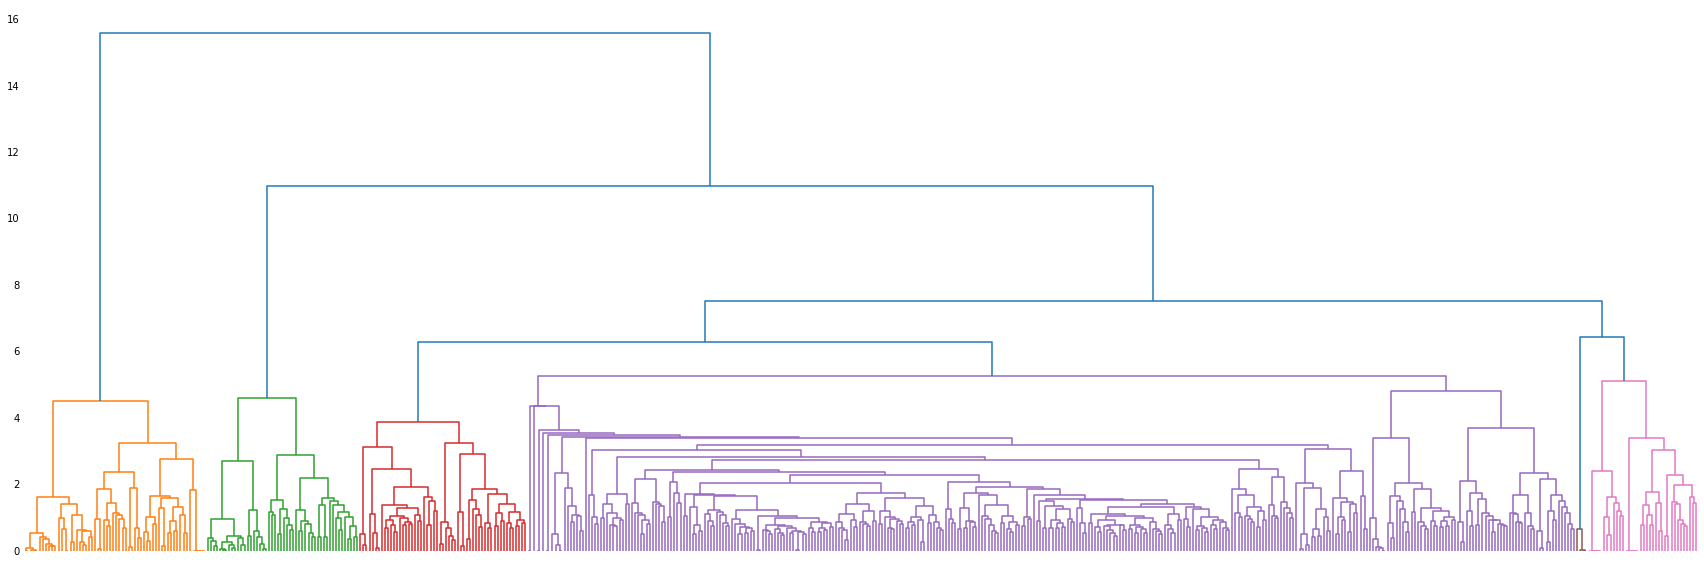

In [5]:
dend_res1 = dendro(0.4,flight2)
h_cluster_result_df = pd.DataFrame()
h_cluster_result_df['index']=dend_res1['leaves']
h_cluster_result_df['group_number']=dend_res1['leaves_color_list']
h_cluster_result_df_sorted = h_cluster_result_df.sort_values('index')

clustered_df = pd.merge(df,h_cluster_result_df,on='index',how='inner')#.to_csv('./new_order_data/09_bulk_1_h_clustering_result.csv',index=False)

# Select best group

In [15]:
clustered_df[clustered_df['conductivity']>0.000001].sort_values(by=['conductivity'],ascending=False)

,composition,mxrd,mpid,conductivity,index,group_number
283,Li7P3S11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.017000,283,C6
280,Li10GeP2S12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.012000,280,C6
126,AntiPerovskite,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001940,126,C5
231,Cu6PS5Br(Cc),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.001300,231,C4
193,Perovskite-CaTiO3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000900,193,C4
162,Li3P1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000700,162,C3
269,Li7La3Zr2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000340,269,C4
276,Li3N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000300,276,C6
224,Li3P1S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000160,224,C4
268,Bi2La2Li6O12Sr1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0.000052,268,C4


In [16]:
ll=[]
for i,r  in h_cluster_result_df.iterrows():
    if r['group_number'] == 'C6' : 
        ll.append(1)
    else:
        ll.append(0)
h_cluster_result_df['best_group'] = ll
h_cluster_result_df

,index,group_number,best_group
0,21,C1,0
1,22,C1,0
2,23,C1,0
3,24,C1,0
4,25,C1,0
...,...,...,...
544,282,C6,1
545,283,C6,1
546,286,C6,1
547,284,C6,1


In [17]:
hr_df = pd.merge(h_cluster_result_df,df,on='index',how='inner').fillna(0)

In [18]:
hr_df.sort_values(by='conductivity',ascending=False).iloc[:25]

,index,group_number,best_group,composition,mxrd,mpid,conductivity
545,283,C6,1,Li7P3S11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.700000e-02
542,280,C6,1,Li10GeP2S12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.200000e-02
510,126,C5,0,AntiPerovskite,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.940000e-03
497,231,C4,0,Cu6PS5Br(Cc),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.300000e-03
446,193,C4,0,Perovskite-CaTiO3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,9.000000e-04
144,162,C3,0,Li3P1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,7.000000e-04
176,269,C4,0,Li7La3Zr2O12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,3.400000e-04
538,276,C6,1,Li3N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,3.000000e-04
485,224,C4,0,Li3P1S4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.600000e-04
175,268,C4,0,Bi2La2Li6O12Sr1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,5.200000e-05


In [19]:
hr_df[hr_df['best_group'] == 1].sort_values(by='conductivity',ascending=False).iloc[:20]

,index,group_number,best_group,composition,mxrd,mpid,conductivity
545,283,C6,1,Li7P3S11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.700000e-02
542,280,C6,1,Li10GeP2S12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.200000e-02
538,276,C6,1,Li3N1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,3.000000e-04
534,350,C6,1,Li3Na5S8Ti2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,8.800000e-06
533,349,C6,1,Li2N2Si1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.600000e-07
524,265,C6,1,Li1O2Y1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1.800000e-08
539,277,C6,1,Li3N2Na3.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000e+00
535,256,C6,1,Br3Li7O2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000e+00
536,257,C6,1,B1Ge1Li1O4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000e+00
537,258,C6,1,B1Li1O2.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.000000e+00


In [27]:
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.linewidth'] = 3
matplotlib.rcParams['font.family'] = 'Arial'

matplotlib.rcParams['xtick.direction'] = "in"
matplotlib.rcParams['ytick.direction'] = "in"
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['ytick.major.size'] = 8

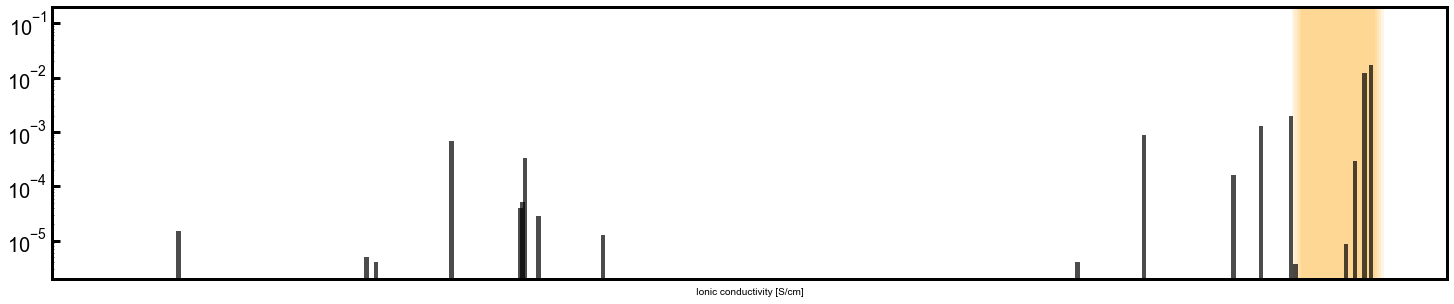

In [33]:
t_df = hr_df.iloc[:]

fig, ax = plt.subplots(figsize=(25,5))
ax.bar(t_df.index,t_df['best_group'],width=5,color='orange',alpha=0.1)
ax.bar(t_df.index,t_df['conductivity'],width=2,color='k',alpha = 0.7)
ax.tick_params(labelsize=20,pad=5)
ax.set_xlabel('Ionic conductivity [S/cm]')
ax.set_xticklabels([])
ax.set_ylim(1e-6*2,0.2)
ax.set_yscale('log')